In [14]:
from environment import truly_dynamic_environment, replay, visualize
import numpy as np
import random
from pcms_helper import *

# Pure Monte Carlo Search
class ConnectFourAgent:
    def __init__(self):
        self.board = self.create_board()

    @staticmethod
    def create_board(rows=6, columns=7):
        return np.zeros((rows, columns), dtype=int)

    @staticmethod
    def random_agent(board, player=1):
        valid_actions = ConnectFourAgent.actions(board)
        if board.shape[1] // 2 in valid_actions:
            return board.shape[1] // 2
        return random.choice(valid_actions)

    @staticmethod
    def actions(board, player=1):
        return [col for col in range(board.shape[1]) if board[0][col] == 0]

    @staticmethod
    def result(board, player, action):
        if board[0][action] != 0:
            print("Error: Illegal move!")
            return None

        row = next((i for i in range(board.shape[0] - 1, -1, -1) if board[i][action] == 0), None)

        if row is not None:
            board[row][action] = 1 if player == 1 else -1
            return board
        else:
            print("Error: Column is full!")
            return None

    @staticmethod
    def is_terminal_state(board, player=1):
        return ConnectFourAgent.winning_move(board, 1) or ConnectFourAgent.winning_move(board, -1) or 0 not in board[0]

    @staticmethod
    def winning_move(board, piece, player=1):
        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r][c + 1] == piece
                    and board[r][c + 2] == piece
                    and board[r][c + 3] == piece
                ):
                    return True
        for c in range(board.shape[1]):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c] == piece
                    and board[r + 2][c] == piece
                    and board[r + 3][c] == piece
                ):
                    return True
        for c in range(board.shape[1] - 3):
            for r in range(board.shape[0] - 3):
                if (
                    board[r][c] == piece
                    and board[r + 1][c + 1] == piece
                    and board[r + 2][c + 2] == piece
                    and board[r + 3][c + 3] == piece
                ):
                    return True
        for c in range(board.shape[1] - 3):
            for r in range(3, board.shape[0]):
                if (
                    board[r][c] == piece
                    and board[r - 1][c + 1] == piece
                    and board[r - 2][c + 2] == piece
                    and board[r - 3][c + 3] == piece
                ):
                    return True
        return False

    @staticmethod
    def utility(board, player=1):
        if ConnectFourAgent.winning_move(board, 1):
            return 1  
        elif ConnectFourAgent.winning_move(board, -1):
            return -1 
        elif 0 not in board[0]:
            return 0 
        else:
            return 0 

    @staticmethod
    def monte_carlo_search(board, num_simulations, player=1):
        win_counts = {action: 0 for action in ConnectFourAgent.actions(board)}
        
        for _ in range(num_simulations):
            action = random.choice(ConnectFourAgent.actions(board))
            sim_board = board.copy()
            sim_board = ConnectFourAgent.result(sim_board, player, action)
            utility = ConnectFourAgent.utility(sim_board, player)  # Calculate utility
            if utility == player:  # Check if utility equals player instead of result
                win_counts[action] += 1
        
        best_action = max(win_counts, key=win_counts.get)
        
        return best_action


def pure_monte_carlo_search2(board, player, n=4, runs=100):

    action_list = actions(board)

    if not action_list:

        return None  # No valid actions

    action_scores = {action: 0 for action in action_list}

    for _ in range(runs):

        for action in action_list:

            simulated_board = check_result(board, player, action)

            score = play_game_trials2(simulated_board, player, n)

            action_scores[action] += score

    best_action = max(action_scores, key=action_scores.get)

    return best_action

 

def play_game_trials2(board, player, n):

    original_player = player

    while not terminal(board, n):

        valid_actions = actions(board)

        if not valid_actions:

            break

        action = np.random.choice(valid_actions)

        board = check_result(board, player, action)

        player *= -1

    return utility(board, original_player, n) or 0

In [15]:
players = [
    {
        "algo": pure_monte_carlo_search2, 
        "name": "Prashant",
        "player": +1, 
        "args": {}

    },
    {
        "algo": ConnectFourAgent.monte_carlo_search, 
        "name": "Juan Carlos",
        "player": -1, 
        "args": {}
    }
]


Prashant took a total of 11.359 seconds
Juan Carlos took a total of 0.0 seconds
The winner is Prashant (1)
Turns Taken: 7


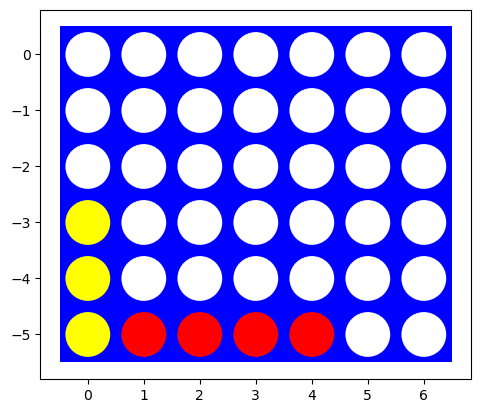

In [19]:
result,final_board,all_boards = truly_dynamic_environment(players, size=(6,7), visual=True)

visualize(final_board)